# 第3章　ニューラルネットワーク

## 3.2 活性化関数

anacondaのバージョンはanaconda3-2020.02(python3.7.6)です。<br>
python -Vで確認してください。<br>
<br>
注記<br>
20210128時点でpython3.8ではcondaでinstallできるtensorflowが対応していないため、python3.7のanacondaを使います。<br>

このレジュメはmacで作っています。<br>
私はpythonをpyenvで管理し、anacondaを使用します。<br>
Pythonライブラリーは極力condaで管理します。<br>
condaとpipはできるだけ混ぜないようにしたほうが安全です。<br>
pyenvでanaconda3-2020.011をインストールしglobal設定します。<br>
<br>
pyenv install anaconda3-2020.11<br>
pyenv global anaconda3-2020.11<br>
その後python3.7の仮想環境をつくりactivateします。<br>
conda create -n py37 jupyter jupyterlab tensorflow matplotlib scikit-learn
conda activate py37<br>
conda upgrade -all<br>
<br>
プロンプトが<br>
(py37)[Hostname]%    <br>
となっていることを確認してjupyter labを立ち上げます。

もしパッケージがimport出来ない場合はコンソールでpy37をactivateし、conda install コマンドで追加インストールします。
<br>

最低限必要なパッケージをimportしておきます。

In [1]:
import os
import numpy as np
import matplotlib.pylab as plt

### 活性化関数　

以下の３つの活性化関数について式の定義と実装を説明します。
１）ステップ関数<br>
２）シグモイド関数<br>
３）ReLU関数<br>


### 3.2.1 ステップ関数の実装

スッテプ関数の式
$$
\begin{equation}
  y(x) =\begin{cases}
 1 & \text{$x>0$} \\
 0 & \text{$x \leq 0$}\\
 \end{cases}
 \end{equation}
$$

In [2]:
### ステップ関数の定義

def step_function(x):
    return np.array(x>0, dtype=np.int)

(-0.1, 1.1)

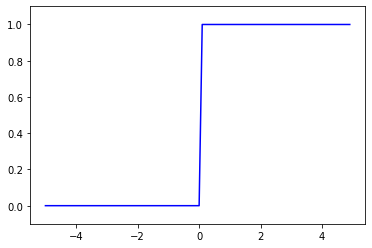

In [3]:
#ステップ関数の表示

x=np.arange(-5.0,5.0,0.1)
y1=step_function(x)
plt.plot(x,y1,color='blue')
plt.ylim(-0.1, 1.1)

### 3.2.2 シグモイド関数の実装

シグモイド関数の式
$$
\begin{equation}
    y=\frac{1}{1+\exp(x)}\\
\end{equation}
$$

In [4]:
### シグモイド関数の定義

def sigmoid_function(x):
    return 1/(1+np.exp(-x))

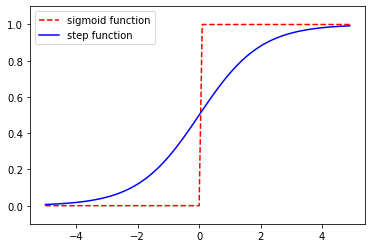

In [5]:
#シグモイド関数の表示

y2=sigmoid_function(x)
plt.plot(x,y1,color='red',linestyle="dashed")
plt.plot(x,y2,color='blue',linestyle="solid")
plt.ylim(-0.1, 1.1)
plt.legend({'step function','sigmoid function'})

### 3.2.3 ReLU関数の実装

ReLU (Rectified Linear Unit) 関数の式
$$
\begin{equation}
  y(x) =\begin{cases}
 x & \text{$x>0$} \\
 0 & \text{$x \leq 0$}\\
 \end{cases}
 \end{equation}
$$

In [6]:
#ReLU関数の定義

def ReLU_function(x):
    return np.maximum(0,x)

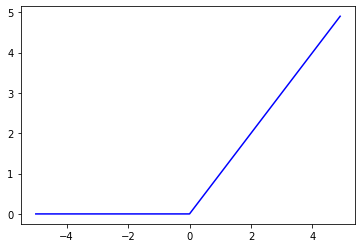

In [7]:
y3=ReLU_function(x)
x=np.arange(-5,5,0.1)
plt.plot(x,y3,color='blue',linestyle='solid')
#plt.ylim(-0.1, 1.1)

## 3.3 多次元配列の計算
ここではpythonの行列表現と行列計算について確認します。<br>

In [8]:
A = np.array([1, 2, 3, 4])
print(A)

[1 2 3 4]


In [9]:
np.ndim(A)

1

In [10]:
A.shape

(4,)

In [11]:
B = np.array([[1, 2], [3, 4], [5, 6]])
print(B)

[[1 2]
 [3 4]
 [5 6]]


In [12]:
np.ndim(B)

2

In [13]:
B.shape

(3, 2)

In [14]:
A = np.array([[1, 2], [3, 4]])
print(A)

[[1 2]
 [3 4]]


In [15]:
B = np.array([[5, 6], [7, 8]])
print(B)

[[5 6]
 [7 8]]


In [16]:
np.dot(A, B)

array([[19, 22],
       [43, 50]])


$$
    \left(
        \begin{array}{cc}
        1 & 2\\
        3 & 4\\
        \end{array}
    \right)
    \left(
        \begin{array}{cc}
        5 & 6\\
        7 & 8\\
        \end{array}
    \right) =
    \left(
        \begin{array}{cc}
        19 & 22\\
        43 & 50\\
        \end{array}
    \right) 
$$

## 3.4 3層ニューラルネットワークの実装


In [17]:
def init_network():
    network = {}
    network['W1'] = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
    network['b1'] = np.array([0.1, 0.2, 0.3])
    network['W2'] = np.array([[0.1, 0.4], [0.2, 0.5],[0.3, 0.6]])
    network['b2'] = np.array([0.1, 0.2])
    network['W3'] = np.array([[0.1, 0.3], [0.2, 0.4]])
    network['b3'] = np.array([0.1, 0.2])
    
    return network

In [18]:
def identity_function(x):
    y = x
    
    return x

In [19]:
def forward(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']
    
    a1 = np.dot(x, W1) + b1
    z1 = sigmoid_function(a1)
    
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid_function(a2)
    
    a3 = np.dot(z2, W3) + b3
    y = identity_function(a3)
    
    return y
    

In [20]:
network = init_network()
x = np.array([1.0, 0.5])
y = forward(network, x)

print(y)

[0.31682708 0.69627909]


## 3.5 出力層の設計 

### 3.5.1（素朴な）softmax関数

合計が１になる。分類器の出力で使用する。
$$
    y_k=\frac{exp(a_k)}{\sum_{k=1}^{n} exp(a_i)}
$$

In [21]:
def simple_softmax(a):
    exp_a=np.exp(a)
    sum_exp_a=np.sum(exp_a)
    y = exp_a / sum_exp_a
    
    return y

In [22]:
a=[10,3,2,1,3]
b=simple_softmax(a)
print(b)

[9.97722562e-01 9.09805211e-04 3.34698633e-04 1.23128746e-04
 9.09805211e-04]


In [23]:
np.sum(b)

1.0

#### オーバーフローで正しく計算されない場合
$exp(1000)$は無限大として扱われてうまく計算できない

In [24]:
a = np.array([1010, 1000, 990])
b = simple_softmax(a)
print(b)

[nan nan nan]


/Users/tomo/.pyenv/versions/anaconda3-2020.11/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  
/Users/tomo/.pyenv/versions/anaconda3-2020.11/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.


### 3.5.2 softmax関数のオーバーフロー対策

$$
    y_k=\frac{exp(a_k)}{\sum_{k=1}^{n} exp(a_i)} = 
    \frac{C exp(a_k)}{C \sum_{i=1}^n exp(a_i)}\\
    =\frac{exp(a_k + logC)}{\sum_{i=1}^n exp(a_i + logC)}\\
    =\frac{exp(a_k + C')}{\sum_{i=1}^n exp(a_i + C')}
$$

分子と分母に同じ数を掛けても同じ計算をしていることになる。<br>
つまり$exp$内で何かの定数を分子、分母に足し算（もしくは引き算）してsoftmax関数に入力しても値は変わらない。<br>
$C'$としては入力信号の最大値を使うのが一般的。


In [25]:
c = np.max(a)
d = simple_softmax(a-c)
print(d)

[9.99954600e-01 4.53978686e-05 2.06106005e-09]


In [26]:
print(np.sum(d))

1.0


In [27]:
#オーバーフロー対策済softmax関数の定義

def softmax(a):
    c = np.max(a)
    exp_a = np.exp(a-c) #オーバーフロー対策
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    
    return y

これで先程と異なりオーバーフローによるエラーがなくなり、正しく計算できるようになった。

In [28]:
d = softmax(a)
print(d)

[9.99954600e-01 4.53978686e-05 2.06106005e-09]


In [29]:
sum(d)

1.0

## 3.6 手書き文字の認識
### 3.6.1 MINISTデータセット

ゼロから作るDeep Learningと異なり、ここではkerasでやってみます。<br>
この部分は教科書でも学習について話しているのではなく、学習済の重みを使って順伝播の流れを見てい来ます。<br>
本質的には、入力の次元と重み行列サイズ、出力次元の関係が理解できればOKです。<br>
<br>
隠れ層として全結合層を使用し、活性化関数は恒等関数を、手書き数字データを1次元ベクトルに変換するところは教科書と同じです。<br>

In [30]:
# Tensorflow2ではkerasが組み込まれているのでそちらを使う
import tensorflow as tf
from tensorflow.keras.callbacks import TensorBoard, ModelCheckpoint
from tensorflow.keras.layers import Activation, Dense, Input
from tensorflow.keras.models import Model
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

### kerasに含まれるMINISTデータの読み込み

In [31]:
from tensorflow.keras.datasets import mnist
(x_train0, y_train), (x_test, y_test) = mnist.load_data()

データの次元の確認です。<br>
テストデータ数は60000で、画像は28x28 pixelsサイズです。

In [32]:
print(x_train0.shape)

(60000, 28, 28)


テストデータの最初＝0番目(pythonは０から始まる)の画像を可視化してみましょう。<br>
5であることがわかります。<br>
ピクセル値は0-255の範囲です。

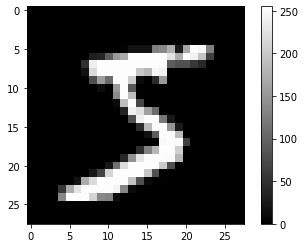

In [33]:
img = x_train0[0]
plt.imshow(img, cmap='gray')
plt.colorbar()

対応するラベルデータy_train[0]が５で有ることを確認します。

In [34]:
y_train[0]

5

以下では、テストデータをテストデータ48000と検証データ12000に手作業で分離します。<br>
学習時にtestデータと検証データを分けることも可能ですが、それはまたいずれ。

In [35]:
(x_train, x_val, y_train, y_val) = train_test_split(x_train0, y_train, test_size=0.2)

In [36]:
x_train.shape

(48000, 28, 28)

In [37]:
x_val.shape

(12000, 28, 28)

In [38]:
y_train.shape

(48000,)

In [39]:
y_val.shape

(12000,)

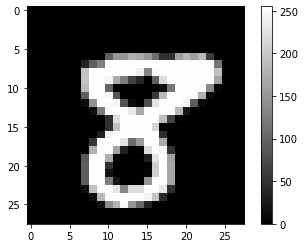

In [40]:
plt.imshow(x_train[1], cmap='gray')
plt.colorbar()

In [41]:
y_train[1]

8

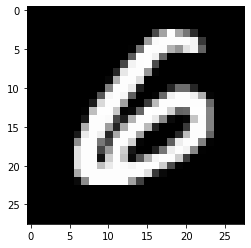

In [42]:
plt.imshow(x_val[100], cmap='gray')

In [43]:
y_val[100]

6

学習データ(28x28)を1次元ベクトルに変換に変換します。

In [44]:
x_train=x_train.reshape(48000,28*28)
x_train.shape

(48000, 784)

同様に検証データ、テストデータもベクトル化しましょう。

In [45]:
x_val=x_val.reshape(12000,28*28)

x_test=x_test.reshape(10000,28*28)

### モデルの定義
入力は748x1次元データです。<br>
隠れそうとして使うのは全結合層２層。<br?
活性化関数は恒等関数を使用します。$y=x$<br>
隠れ層1に50units、隠れ層2に100units、出力層は10unitsとなります。<br>
<br>
行列としては<br>
入力層　 隠れ層１　 隠れ層２　出力層  出力<br>
1x784  784x50 　 50x100  100x10 →10<br>
２番目以降、隣り合う数字が一致していれば行列演算が可能です。

In [46]:
def model_functional_api():
    
    inputs = Input (shape=(28*28, ))
    x = Dense(50, activation ='linear')(inputs)
    x = Dense(100, activation = 'linear')(x)
    predictions = Dense(10, activation ='softmax')(x)

    model = Model(inputs=inputs, outputs = predictions)
    return model

### データの前処理
ピクセル値0-255を0-1に規格化し、<br>
ラベルデータはone-hot表現(例えば３は[0, 0, 0, 1, 0,・・・]という表現になる）にする関数preprocessを定義します。


In [47]:
def preprocess(data, label=False):
    if label:
        data = to_categorical(data)
    else:
        data = data.astype('float32') / np.max(data)
        
    return data

画像データの規格化処理です。

In [48]:
X_train = preprocess(x_train)
X_val = preprocess(x_val)
X_test = preprocess(x_test)

ラベルのone-hot表現化処理です。

In [49]:
Y_train = preprocess(y_train, label = True)
Y_val = preprocess(y_val, label = True)
Y_test = preprocess(y_test, label = True)

one-hot表現になっていることを確認します。

In [50]:
Y_train[1]

array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0.], dtype=float32)

先程定義したモデル関数でモデル=modelを作成し、その構造を確認しましょう。

In [51]:
model = model_functional_api()
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense (Dense)                (None, 50)                39250     
_________________________________________________________________
dense_1 (Dense)              (None, 100)               5100      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 45,360
Trainable params: 45,360
Non-trainable params: 0
_________________________________________________________________


この部分は最適化関数、ロス関数などの設定です。<br>
詳細はは4章以降ででてくるので後ほど。<br>

In [52]:
model.compile(optimizer ='rmsprop',
             loss='categorical_crossentropy',
             metrics = ['accuracy'])

## 3.6.3 バッチ処理の部分
バッチサイズ＝100にしているので先程の重み行列の計算は<br>
<br>
100x784  784x50 50x100 100x10 →100x10<br>
となります。

In [53]:
history=model.fit(X_train, Y_train, 
                  epochs=5, 
                  batch_size=100,
                  validation_data = (X_val, Y_val))

Train on 48000 samples, validate on 12000 samples
Epoch 1/5
48000/48000 [==============================] - 3s 67us/sample - loss: 0.4068 - accuracy: 0.8842 - val_loss: 0.3277 - val_accuracy: 0.9097
Epoch 2/5
48000/48000 [==============================] - 2s 39us/sample - loss: 0.3045 - accuracy: 0.9133 - val_loss: 0.3001 - val_accuracy: 0.9194
Epoch 3/5
48000/48000 [==============================] - 2s 38us/sample - loss: 0.2915 - accuracy: 0.9173 - val_loss: 0.2946 - val_accuracy: 0.9206
Epoch 4/5
48000/48000 [==============================] - 2s 40us/sample - loss: 0.2836 - accuracy: 0.9195 - val_loss: 0.3098 - val_accuracy: 0.9168
Epoch 5/5
48000/48000 [==============================] - 2s 41us/sample - loss: 0.2791 - accuracy: 0.9227 - val_loss: 0.2953 - val_accuracy: 0.9206


In [54]:
classes = model.predict(X_test, batch_size = 128)

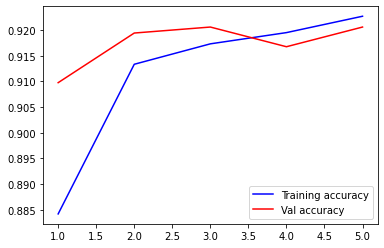

In [55]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

epochs = range(1, len(acc)+1)
plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Val accuracy')
plt.legend()

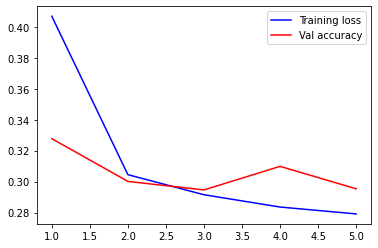

In [56]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Val accuracy')
plt.legend()

In [57]:
classes.astype

<function ndarray.astype>

In [58]:
classes.shape

(10000, 10)

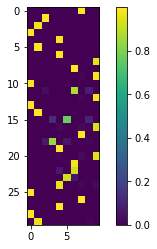

In [59]:
plt.imshow(classes[:30,:10])
plt.colorbar()

お疲れさまでした。４章に続きます。